In [68]:
from datetime import datetime, timedelta
from cartopy.crs import NorthPolarStereo, LambertAzimuthalEqualArea, Globe
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import numpy as np
from scipy.interpolate import RegularGridInterpolator


In [4]:
# AUTOMATIC CONC PRODUCT

url_aut = 'https://nrt.cmems-du.eu/thredds/dodsC/cmems_obs-si_arc_phy-siconc_nrt_L4-auto_P1D'
with Dataset(url_aut) as ds:
    x_aut = ds['x'][:]
    y_aut = ds['y'][:]
    time_aut = ds['time'][:]
"""
grid_mapping_name: polar_stereographic
straight_vertical_longitude_from_pole: 0.0
latitude_of_projection_origin: 90.0
standard_parallel: 90.0
false_easting: 0.0
false_northing: 0.0
semi_major_axis: 6371000
semi_minor_axis: 6371000
proj4_string: +proj=stere +lat_0=90.0 +lon_0=0.0 +lat_ts=90.0 +R=6.371e+06 +units=m +no_defs

axis: T
standard_name: time
calendar: standard
long_name: reference time of product
units: days since 1970-01-01 00:00:00
_ChunkSizes: 1024
"""

'\ngrid_mapping_name: polar_stereographic\nstraight_vertical_longitude_from_pole: 0.0\nlatitude_of_projection_origin: 90.0\nstandard_parallel: 90.0\nfalse_easting: 0.0\nfalse_northing: 0.0\nsemi_major_axis: 6371000\nsemi_minor_axis: 6371000\nproj4_string: +proj=stere +lat_0=90.0 +lon_0=0.0 +lat_ts=90.0 +R=6.371e+06 +units=m +no_defs\n\naxis: T\nstandard_name: time\ncalendar: standard\nlong_name: reference time of product\nunits: days since 1970-01-01 00:00:00\n_ChunkSizes: 1024\n'

In [31]:
#REFERENCE MANUAL PRODUCT

url_met = 'https://nrt.cmems-du.eu/thredds/dodsC/METNO-ARC-SEAICE_CONC-L4-NRT-OBS'
with Dataset(url_met) as ds:
    x_met = ds['xc'][:]
    y_met = ds['yc'][:]
    time_met = ds['time'][:]
"""
grid_mapping_name: polar_stereographic
straight_vertical_longitude_from_pole: 0.0
latitude_of_projection_origin: 90.0
standard_parallel: 90.0
false_easting: 0.0
false_northing: 0.0
proj4_string: +proj=stere lon_0=0.0 lat_ts=90.0 lat_0=90.0 a=6371000.0 b=6371000.0

long_name: reference time of sea ice file
units: seconds since 1981-01-01 00:00:00
calendar: standard

"""

'\nstraight_vertical_longitude_from_pole: -45\nlatitude_of_projection_origin: 90\nstandard_parallel: 90\ngrid_mapping_name: polar_stereographic\nfalse_easting: 0.0\nfalse_northing: 0.0\nproj4_string:  +proj=stere +lon_0=-45 +lat_ts=90 +lat_0=90 +a=6371000 +b=6371000\n\nlong_name: reference time of sea ice file\nunits: seconds since 1981-01-01 00:00:00\ncalendar: standard\n\n'

In [32]:
datetime_met = [datetime(1981,1,1) + timedelta(seconds=int(sec)) for sec in time_met]

In [20]:
datetime_aut = [datetime(1970,1,1) + timedelta(int(day)) for day in time_aut]

In [36]:
datetime_aut[-4], datetime_met[-1]

(datetime.datetime(2023, 5, 26, 0, 0), datetime.datetime(2023, 5, 26, 14, 0))

In [37]:
with Dataset(url_aut) as ds:
    sic_aut = ds['conc'][-4, :, :]

In [38]:
with Dataset(url_met) as ds:
    sic_met = ds['ice_concentration'][-1, :, :]

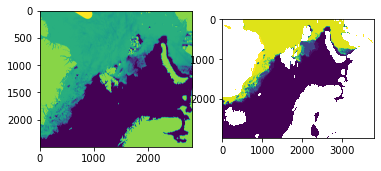

In [46]:
fig, axs = plt.subplots(1,2)
axs[0].imshow(sic_aut)
axs[1].imshow(sic_met[::-1])
plt.show()

In [13]:
!ncdump -h /data1/antonk/tmp/s1_icetype_mosaic_202305310600.nc

netcdf s1_icetype_mosaic_202305310600 {
dimensions:
	time = 1 ;
	yc = 2500 ;
	xc = 2800 ;
variables:
	int time(time) ;
		time:long_name = "reference time of satellite image" ;
		time:units = "days since 1970-01-01 00:00:00" ;
		time:calendar = "standard" ;
		time:axis = "T" ;
	float yc(yc) ;
		yc:axis = "Y" ;
		yc:long_name = "y-coordinate in Cartesian system" ;
		yc:units = "m" ;
		yc:standard_name = "projection_y_coordinate" ;
	float xc(xc) ;
		xc:axis = "X" ;
		xc:long_name = "x-coordinate in Cartesian system" ;
		xc:units = "m" ;
		xc:standard_name = "projection_x_coordinate" ;
	float lat(yc, xc) ;
		lat:long_name = "latitude coordinate" ;
		lat:standard_name = "latitude" ;
		lat:units = "degrees_north" ;
	float lon(yc, xc) ;
		lon:long_name = "longitude coordinate" ;
		lon:standard_name = "longitude" ;
		lon:units = "degrees_east" ;
	char crs ;
		crs:grid_mapping_name = "polar_stereographic" ;
		crs:straight_vertical_longitude_from_pole = 0. ;
		crs:latitude_of_projection_origin =

In [2]:
# AUTOMATIC TYPE PRODUCT
url_aut = '/data1/antonk/tmp/s1_icetype_mosaic_202305310600.nc'
with Dataset(url_aut) as ds:
    ice_type = ds['ice_type'][0].filled(0)
    x_aut = ds['xc'][:]
    y_aut = ds['yc'][:]

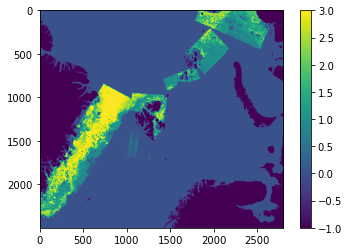

In [14]:
plt.imshow(ice_type)
plt.colorbar()

In [59]:
ll /data1/antonk/tmp/ice_conc_greenland_20230530*nc

-rw-r--r-- 1 antonk 19054913 May 31 11:24 /data1/antonk/tmp/ice_conc_greenland_202305300905.nc
-rw-r--r-- 1 antonk 19029970 May 31 11:24 /data1/antonk/tmp/ice_conc_greenland_202305301220.nc
-rw-r--r-- 1 antonk 19022550 May 31 13:03 /data1/antonk/tmp/ice_conc_greenland_202305302130.nc


In [41]:
!ncdump -h /data1/antonk/tmp/ice_conc_greenland_202305301220.nc

netcdf ice_conc_greenland_202305301220 {
dimensions:
	time = 1 ;
	xc = 2232 ;
	yc = 3318 ;
	polygon_reference = 1000 ;
variables:
	int time(time) ;
		time:long_name = "reference time of sea ice file" ;
		time:units = "seconds since 1981-01-01 00:00:00" ;
		time:calendar = "standard" ;
	float yc(yc) ;
		yc:axis = "Y" ;
		yc:long_name = "y-coordinate in Cartesian system" ;
		yc:units = "m" ;
	float xc(xc) ;
		xc:axis = "X" ;
		xc:long_name = "x-coordinate in Cartesian system" ;
		xc:units = "m" ;
	float lat(yc, xc) ;
		lat:long_name = "latitude" ;
		lat:units = "degrees_north" ;
	float lon(yc, xc) ;
		lon:long_name = "longitude" ;
		lon:units = "degrees_east" ;
	char crs ;
		crs:grid_mapping_name = "polar_stereographic" ;
		crs:false_easting = 0.f ;
		crs:false_northing = 0.f ;
		crs:proj4_string = " +proj=stere +lon_0=-45 +lat_ts=90 +lat_0=90 +a=6371000 +b=6371000" ;
		crs:straight_vertical_longitude_from_pole = -45LL ;
		crs:latitude_of_projection_origin = 90LL ;
		crs:standard_paralle

In [41]:
url_aut = '/data1/antonk/tmp/cmems_obs-si_arc_physic_nrt_1km-grl_P1D-irr_2023_05/ice_conc_greenland_202305310800.nc'
with Dataset(url_aut) as ds:
    ice_poly_id_grid = ds['ice_poly_id_grid'][0]
    polygon_id = ds['polygon_id'][0]
    polygon_reference = ds['polygon_reference'][:]
    CT = ds['CT'][0]
    SA = ds['SA'][0]
    CA = ds['CA'][0]
    SB = ds['SB'][0]
    CB = ds['CB'][0]
    x_man = ds['xc'][:]
    y_man = ds['yc'][:]
    

In [42]:
CT_grid = np.zeros(ice_poly_id_grid.shape)
SA_grid = np.zeros(ice_poly_id_grid.shape)
CA_grid = np.zeros(ice_poly_id_grid.shape)
SB_grid = np.zeros(ice_poly_id_grid.shape)
CB_grid = np.zeros(ice_poly_id_grid.shape)

for p_ref in polygon_reference:
    i = np.where(p_ref == polygon_reference)[0]
    p_id = polygon_id[i]
    if p_id == -9:
        continue
    mask = ice_poly_id_grid == p_id
    CT_grid[mask] = CT[i]
    SA_grid[mask] = SA[i]
    CA_grid[mask] = CA[i]
    SB_grid[mask] = SB[i]
    CB_grid[mask] = CB[i]
    

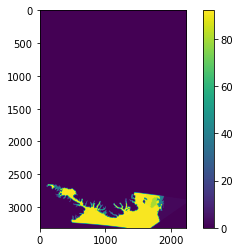

In [43]:
plt.imshow(CT_grid)
plt.colorbar()

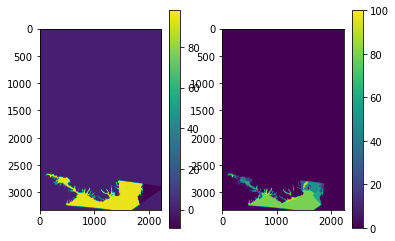

In [44]:
fig, axs = plt.subplots(1, 2)
imsh = axs[0].imshow(SA_grid)
plt.colorbar(imsh, ax = axs[0])

imsh = axs[1].imshow(CA_grid, clim=[0,100])
plt.colorbar(imsh, ax = axs[1])
plt.show()

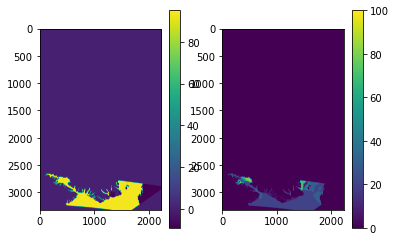

In [45]:
fig, axs = plt.subplots(1, 2)
imsh = axs[0].imshow(SB_grid)
plt.colorbar(imsh, ax = axs[0])

imsh = axs[1].imshow(CB_grid, clim=[0,100])
plt.colorbar(imsh, ax = axs[1])
plt.show()

In [116]:
# Define projection of the sea ice drift product +proj=stere +lat_0=90n +lon_0=0e +lat_ts=90n +r=6371000
crs_aut = NorthPolarStereo(0, 90)
# define projection of the thickness product +proj=stere +lon_0=-45 +lat_ts=90 +lat_0=90 +a=6371000 +b=6371000
crs_man = NorthPolarStereo(-45, 90)

In [117]:
# create matrices of coordinates for reprojection of SIT product from LAEA to NPS projection
# NPS coordinates on NPS grid
x_aut_grd, y_aut_grd = np.meshgrid(x_aut, y_aut)
# LAEA coordinates on NPS grid
grd_man = crs_man.transform_points(crs_aut, x_aut_grd, y_aut_grd)
x_grd_man, y_grd_man = grd_man[:,:,0], grd_man[:,:,1]

In [118]:
# Prepare interpolators for thickness and concentration
rgi = RegularGridInterpolator((y_man, x_man), ice_poly_id_grid.data, method='nearest', bounds_error=False)
# Do interpolation from LAEA grid onto NPS grid
ice_poly_id_grid_pro = rgi((y_grd_man, x_grd_man))

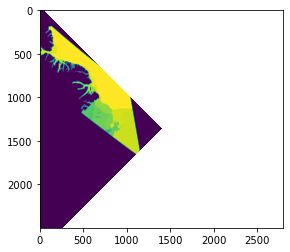

In [122]:
plt.imshow(ice_poly_id_grid_pro)

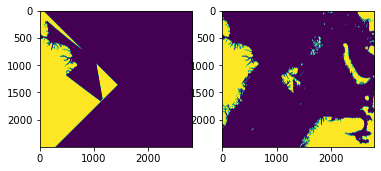

In [119]:
fig, axs = plt.subplots(1,2)
axs[0].imshow(ice_poly_id_grid_pro == -99)
axs[1].imshow(ice_type<0)
plt.show()

In [120]:
mask1 = (ice_poly_id_grid_pro == -99).astype(int)
mask2 = (ice_type<0).astype(int)

(1000.0, 0.0)

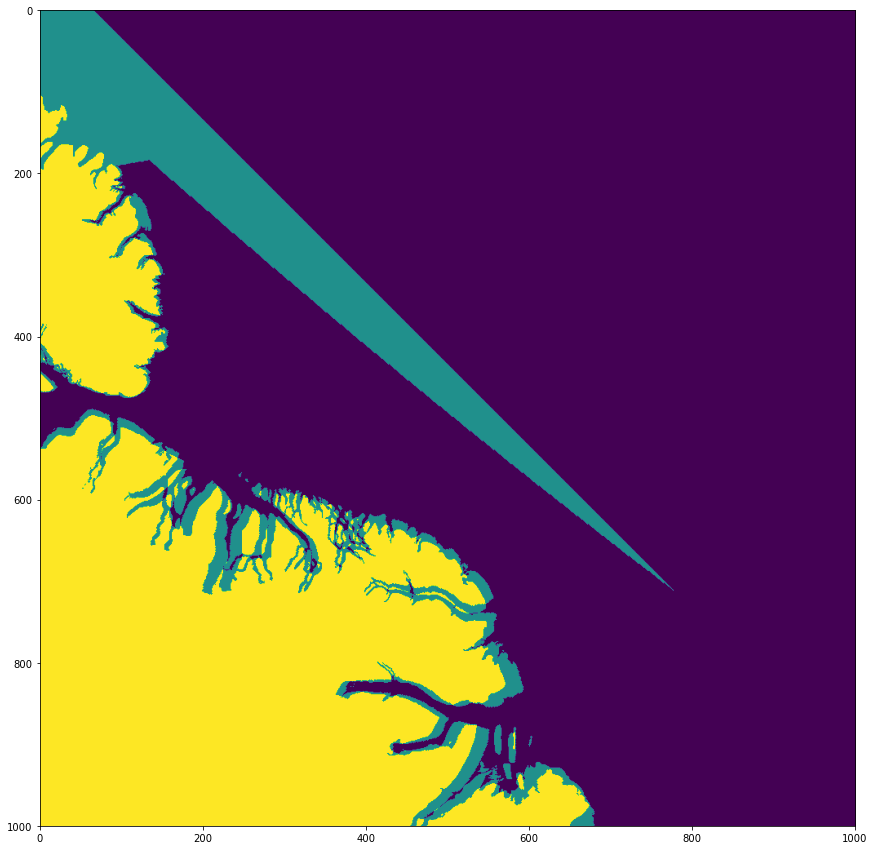

In [121]:
fig, axs = plt.subplots(1,1,figsize=(15,15))
plt.imshow(mask1+mask2)
plt.xlim([0, 1000])
plt.ylim([1000, 0])